In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("data (1).csv")

In [7]:
data.head()

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [8]:
data.isnull().sum()

F                          0
N                          0
Prprice per square foot    0
dtype: int64

In [9]:
data.describe()

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


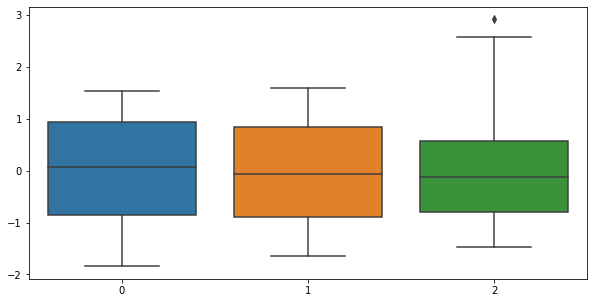

In [19]:
plt.figure(figsize=(10,5))
box_plot=sns.boxplot(data=data)
#box_plot.set_xticklabels(box_plot.get_xticklabels(),rotation = 60)

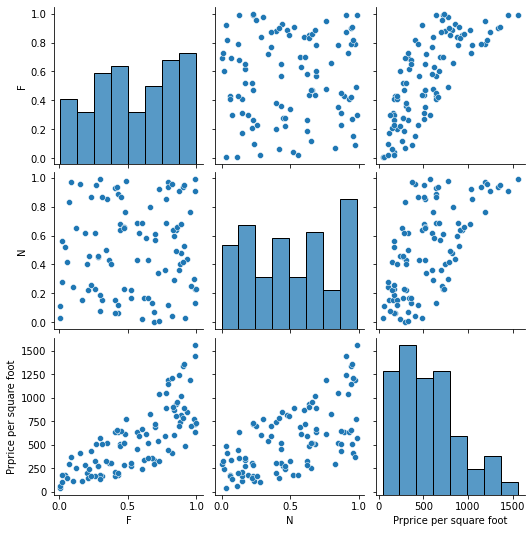

In [11]:
sns.pairplot(data)

# Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scalar=StandardScaler()
scaled=scalar.fit_transform(data)

In [15]:
data=pd.DataFrame(scaled)
data

,0,1,2
0,-0.377265,0.583471,-0.124647
1,1.503928,-0.889115,0.471350
2,0.990875,-0.692770,0.155381
3,-0.924521,-0.169184,-0.821290
4,-1.642794,1.074333,-0.764919
...,...,...,...
95,1.503928,-1.216356,0.237303
96,-0.924521,-0.136460,-0.816312
97,1.093486,-0.463701,0.412173
98,-1.095538,1.205230,-0.346338


In [34]:
#Independant and dependant variable variable

#Independant variable
X=data.iloc[:,0:2].values

#dependant variable
y= data.iloc[:,-1].values


In [35]:
y

array([-0.1246473 ,  0.47135029,  0.15538128, -0.82128965, -0.76491932,
        0.80051481,  1.40021641, -0.28655284,  0.24873379, -0.1248788 ,
       -1.09147947,  1.99178655,  0.97564481,  2.27305944, -1.11216981,
       -0.80493994, -0.10644559, -0.09249769,  1.09382572,  0.8595474 ,
        0.24856016, -0.71051675,  1.42325069, -0.6418769 , -1.10646912,
       -1.28674999, -0.55630859,  0.92020048, -0.72492764, -0.86186008,
       -0.61641186,  1.85320467, -0.42137284,  0.98771176, -0.10407271,
        0.24462466, -0.7301364 , -1.13097921, -0.90703159,  2.58943358,
        0.15853547, -1.09854023,  0.1135376 , -0.57370005,  0.33927935,
        1.85051347, -0.79675062, -0.41327033, -1.48199158, -1.12284776,
       -1.43412889,  0.25533155, -0.53845413,  0.42991173,  0.17803938,
       -1.18766785, -1.28834156, -0.65379917, -1.01007817,  2.33316272,
        1.01748849, -0.19354758, -1.01702318, -1.01919349, -1.17296758,
        0.55295415, -0.14808671,  2.92154973, -1.12568364, -0.33

# Train test split

In [17]:
#Train and Test Data

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((67, 2), (33, 2), (67,), (33,))

# Multiple Linear Regression model

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [24]:
y_pred = reg.predict(X_test)
y_pred

array([-0.38024993, -1.46685207,  0.34511499, -1.43683603,  0.28735087,
       -0.94279458,  0.09420332,  0.05238096,  0.35692131,  0.42755898,
        0.58070739,  1.22720801,  1.46782533,  1.7544672 , -0.08858314,
       -0.45949222,  1.26827438, -1.29618318,  0.99017038,  0.43333989,
       -0.38131716, -1.11057302, -0.80572143,  0.8416689 ,  1.53777376,
       -2.31892905,  1.27292131,  0.29764521,  0.52005281,  1.11047904,
        0.99375007,  0.75206552,  0.50366631])

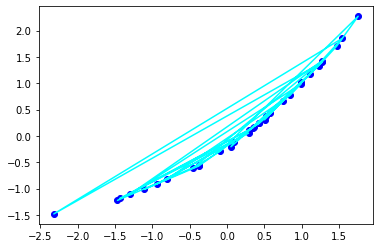

In [29]:
plt.scatter(y_pred,y_test,color='blue')
plt.plot(y_pred,y_test,color='cyan')

# Checking Rsquare and Means Square Error

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9385635133278601

As r_2 score is very close to 1 our model is prefectly build using Multiple Linear regression model.

# Using Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lg1 = LinearRegression()
lg1.fit(X_poly,y_train)

LinearRegression()

In [32]:
y_pred1 = lg1.predict(poly_reg.fit_transform(X_test))

y_pred1

array([-0.56270448, -1.2227049 ,  0.16216197, -1.1719594 ,  0.03324972,
       -0.91699257, -0.09623108, -0.203153  ,  0.19323924,  0.22473436,
        0.43358595,  1.37072318,  1.72813158,  2.25054775, -0.26852216,
       -0.61640177,  1.41372044, -1.11092934,  1.01339566,  0.23497372,
       -0.55505032, -1.01308473, -0.83146376,  0.80127362,  1.884935  ,
       -1.48511529,  1.40536955,  0.11842676,  0.38572233,  1.19016708,
        1.01692838,  0.67605217,  0.30526106])

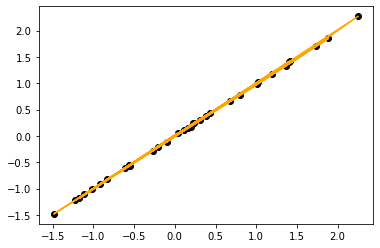

In [38]:
plt.scatter(y_pred1,y_test,color='black')
plt.plot(y_pred1,y_test,color='orange')

In [40]:
from sklearn import metrics
r2_score=metrics.r2_score(y_test,y_pred1)
r2_score

0.9997355010775064

# After using both Multiple Linear Regression and Polynomial Regression I came to the conclusion that polynomial Regression is more accurate than Multiple Linear regression as the R2 value is most closer to 1 and plot is alspo best fit